In [1]:
import sys;sys.path.append('../adcirc_swan')
import adcirc as adc;import regional as reg
from arctic import *;import utils as ut
import pandas as pd;import numpy as np
import pathlib as pl;import netCDF4 as nc4;import xarray as xr
import matplotlib.pyplot as plt;import matplotlib as mpl;
import cartopy as cart;import cartopy.crs as ccrs
import scipy.interpolate

In [2]:
root = pl.Path('/Users/tmiesse/work/FHRL/arctic/model/ice_analysis')
ncfile = nc4.Dataset(root /'storm201911' / 'new_mesh+cfs+era5ice' / 'outputs'/ 'swan_HS.63.nc')
start = '20191101'
dt2 = pd.date_range(start=start,periods=int(len(ncfile.variables['swan_HS'][:,0])),freq='60min')
x,y = ncfile.variables['x'][:],ncfile.variables['y'][:]

---
#### Introduction

The Arctic sea ice has been declining at an unprecedented rate in recent decades, with a significant impact on the Arctic coastal regions. The reduction in sea ice has led to changes in the ocean currents, atmospheric circulation, and the cryosphere, which have a cascading effect on the ecosystems and human activities in the Arctic. To better understand the impacts of Arctic sea ice decline on coastal regions, coastal modeling has become an essential tool. Coastal modeling is the process of simulating the interactions between the ocean, land, and atmosphere in coastal regions using mathematical models. These models can predict the behavior of waves, tides, and currents, and can also simulate the effects of storms, sea level rise, and other coastal hazards.

Coastal modeling can also help to identify the vulnerabilities of Arctic coastal communities and infrastructure to changing environmental conditions. For example, the models can help predict how the erosion of coastal permafrost and the loss of sea ice will affect the stability of coastal infrastructure and the availability of resources for Arctic communities. The development of accurate coastal models is critical to understanding the complex interactions between Arctic sea ice decline, ocean currents, and coastal regions. This manuscript reviews the current state of knowledge on Arctic sea ice decline and its impacts on coastal regions, and highlights the latest advances in coastal modeling techniques. By providing a comprehensive review of the current understanding of Arctic coastal modeling, this manuscript aims to contribute to the development of effective strategies for mitigating the impacts of sea ice decline on Arctic coastal regions.

There are several sea ice models that are currently used to simulate sea ice dynamics in the Arctic. One widely used model is the European Centre for Medium-Range Weather Forecasts (ECMWF) Re-Analysis (ERA5) sea ice model, which is based on the numerical integration of the sea ice concentration and thickness equations. This model uses a two-layer thermodynamic model to simulate the heat transfer between the atmosphere and the ocean, and between the ocean and the sea ice. Another commonly used model is the National Snow and Ice Data Center (NSIDC) sea ice model, which is a coupled ice-ocean model that simulates the thermodynamic and dynamic processes that govern the behavior of sea ice. The NSIDC model uses a finite-element method to solve the Navier-Stokes equations, which describe the fluid motion of the sea ice and the ocean. A third sea ice model, called HYbrid Coordinate Ocean Model with Arctic Region Nesting (HYCOM-AR), is a nested model that combines a high-resolution Arctic model with a coarser global model. The HYCOM-AR model uses a hybrid vertical coordinate system to simulate the ocean and sea ice dynamics, and it incorporates data assimilation techniques to improve the accuracy of the simulations. Each of these sea ice models has its own strengths and weaknesses, and the choice of model depends on the specific research questions being addressed. For example, ERA5 may be more suitable for studying long-term trends in sea ice extent, while the NSIDC model may be better for simulating short-term sea ice dynamics during a specific event. Overall, continued development and improvement of sea ice models is critical for advancing our understanding of Arctic sea ice dynamics and their impacts on the coastal regions. The Simulating Waves Nearshore (SWAN) model is a widely used numerical model for simulating wind-generated waves in the ocean. When simulating waves in regions with sea ice, it is important to consider the interactions between the waves and the sea ice, as these interactions can significantly affect wave propagation and dissipation.

In recent years, efforts have been made to incorporate the effects of sea ice into wave models such as SWAN. One approach is to modify the wave-current interaction terms in the SWAN equations to account for the presence of sea ice. These modifications can include terms that account for the damping effect of sea ice on wave energy and the effects of sea ice concentration and thickness on wave propagation. Another approach is to use a coupled wave-ice-ocean model, which allows for the simultaneous simulation of wave, ice, and ocean dynamics. In this type of model, the wave-ice interactions are accounted for by considering the effects of sea ice concentration and thickness on wave attenuation and dissipation, as well as the effects of wave-induced motion on sea ice dynamics. The development of models that incorporate the effects of sea ice on wave dynamics is important for understanding the complex interactions between sea ice and waves in Arctic coastal regions. Accurate wave modeling can help predict the impacts of sea ice on coastal infrastructure, such as coastal erosion and damage to sea ice ports and harbors. Additionally, wave modeling can be used to support safe and efficient marine operations in regions with sea ice, such as oil and gas exploration, shipping, and fisheries.

The presence of sea ice can significantly affect coastal wave dynamics. Sea ice can act as a barrier to wave propagation, causing waves to dissipate or reflect off the ice. The interaction between waves and sea ice depends on the concentration, thickness, and distribution of the ice, as well as the characteristics of the waves, such as their frequency and direction. In regions with extensive sea ice, the attenuation of waves due to interaction with the ice can significantly reduce the energy reaching the coast. This can have important consequences for coastal erosion and sediment transport, as waves are a key driver of these processes. Coastal erosion can be exacerbated in areas where sea ice concentrations are high, as the ice can protect the coast from wave action, leading to more rapid erosion.

On the other hand, the presence of sea ice can also dampen the effects of storm surges, which can be beneficial for coastal communities that are vulnerable to coastal flooding. Sea ice can also help to protect coastal infrastructure, such as ports and harbors, from the effects of wave action. Overall, the impact of sea ice on coastal waves depends on a variety of factors, and is a complex and dynamic process. Understanding the interactions between sea ice and waves is essential for predicting the impacts of sea ice decline on coastal regions and developing effective strategies for mitigating these impacts.

---
### Method

The coupled Advanced CIRCulation model (ADCIRC) and Simulating WAves Nearshore (SWAN) simulates the water level by solving the generalized wave continuity equation (GWCE) and currents by using the vertically integrated shallow water equation \cite{WESTERINK1994a} with the wave model solving a Eularian, phase-averaged, refraction model \cite{Booij1999}, which provides wave propagation in irregular bathymetry and topography \cite{Gorrell2011}. 


#### Numerical Model Mesh

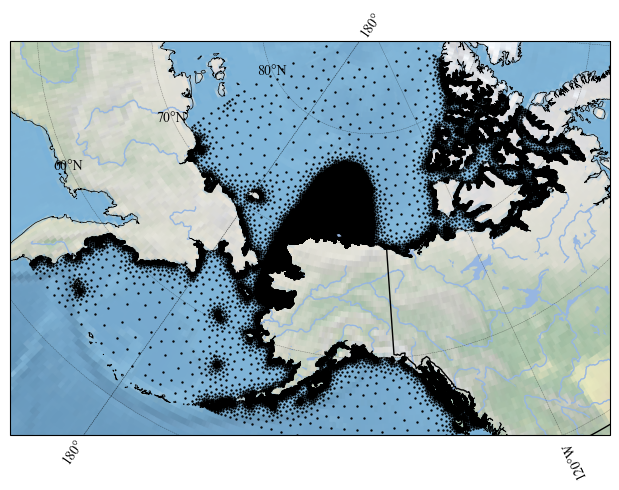

In [5]:
# map boundary ------------------------------------------------------------------------
lat1,lat2 = 53,87
lon1,lon2 = -205, -110

# -------------------------------------------------------------------------------------
plt.rcParams["font.family"] = "Times New Roman"
fig = plt.figure(figsize=(6,5))
proj = ccrs.NorthPolarStereo(central_longitude=-145)
ax = plt.axes([0,0,1.,1.],projection=proj)
fig.tight_layout(pad=0.75)

# plot mesh
cf = ax.scatter(x,y,c='k',s=0.5,transform = ccrs.PlateCarree())
ax.set_extent([lon1, lon2, lat1, lat2], crs=ccrs.PlateCarree())
ax.coastlines(resolution='10m',linewidth=0.5)
ax.add_feature(cart.feature.LAKES)
ax.add_feature(cart.feature.RIVERS, linestyle="-")
ax.add_feature(cart.feature.BORDERS.with_scale("50m"), linestyle="-")
ax.stock_img()
gl = ax.gridlines(draw_labels=True, linewidth=0.3, color="black", alpha=0.5, linestyle="--")
plt.show(fig)



#### Sea Ice Reanalysis Model Data

| <span style="font-size:1.25em;"> Model </span>  | <span style="font-size:1.25em;"> Description    </span> |<span style="font-size:1.25em;"> Spatial Resolution</span> | <span style="font-size:1.25em;"> Temporal Resolution</span> |
| :---------------: | :----------------------------------------: | :-------------: | :-------------: |
| RASM-G           | Regional Arctic System Model.The forced sea ice–ocean model configuration,which we term RASM-G, was used for a high spatial resolution hindcast simulation | ~9km   | Monthly |
| HYCOM+CICE   | The Los Alamos-developed CICE model (Hunke and Lipscomb, 2008) is two-way coupled to HYCOM via the Earth System Modeling Framework (ESMF) (Hill et al., 2004). The sea ice and ocean models use the same grid configuration and pass information back and forth every hour. CICE includes sophisticated ice thermodynamics such as multiple ice thickness layers, multiple snow layers and the capability to forecast multi-categories of ice thickness according to World Meteorological Organization definitions | 1/12 degree (~10km)    | Daily |
| ERA5   | ERA5 was produced using 4D-Var data assimilation in CY41R2 of ECMWF’s Integrated Forecast System (IFS), with 137 hybrid sigma/pressure (model) levels in the vertical, with the top level at 0.01 hPa. Atmospheric data are available on these levels and they are also interpolated to 37 pressure, 16 potential temperature and 1 potential vorticity level(s). "Surface or single level" data are also available, containing 2D parameters such as precipitation, 2m temperature, top of atmosphere radiation and vertical integrals over the entire atmosphere. The IFS is coupled to a soil model, the parameters of which are also designated as surface parameters, and an ocean wave model.| 0.25 degrees | Hourly |
| NSIDC   |  a number of quality control steps are applied (Cavalieri et al. 1999; Comiso & Nishio 2008). First, weather filters based on a threshold of TB ratios are used to eliminate low concentration values over open water areas due to wind roughening of the ocean surface or atmospheric moisture. Second, a land-spillover correction is applied to remove spurious ice along coastlines due to mixed oceanland grid cells; the TB signature from such grid cells is similar to low concentration ice within the algorithms. Third, interpolation is used to fill missing data regions. For isolated missing grid cells, a bilinear interpolation is used to fill missing values in the input TBs. For larger missing regions (often due to missing swaths), a temporal interpolation is done on the resultant concentration fields, filling in the missing values with an average of concentrations from the day before and the day after. Finally, the fields undergo a manual visual inspection for regions of erroneous concentration data and such data are removed via interactive analysis and replaced with interpolated concentration values. Unfortunately, provenance of these manual corrections is not available, precluding the ability to fully recreate the production of the fields, which is a prerequisite for CDR data sets. Trackable automated methods to replace the manual corrections (such as use of temporal filters) will be investigated for future revisions of the data set.      | 25km      | Daily |


In [ ]:
path = pl.Path('/Users/tmiesse/work/FHRL/arctic/model/ice_paper')

In [ ]:
files = list((path / 'northstorm2004' / 'sea_ice' /'hycom').glob('*'))
grib = xr.open_dataset(path / files[1])

#### Storms and their tracks

In [7]:
file = pd.read_csv('/Users/tmiesse/work/FHRL/arctic/climate_data/era_interim/tracks/Post_processed_cyclones_MPI_ESM1_2_HR_historical.csv')
storm = generate_tracks(file)

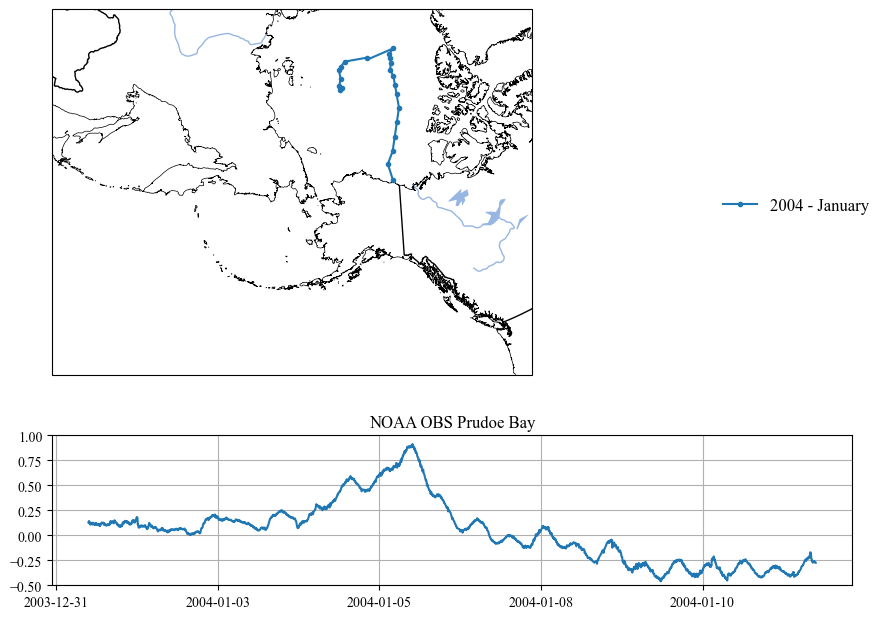

In [12]:
start,end = 2004,2005
xmin,xmax = -200,-120
ymin,ymax = 60,90
gen_storm_track_map(storm,start,end,xmin,xmax,ymin,ymax)

#### Supplementary Functions

In [4]:
# -------------------------------------------------------------------------------------
def gen_storm_track_map(storm:dict,start,end,xmin,xmax,ymin,ymax,lat1=45,lat2=90,lon1=-240,lon2=-120,
                        station=9497645,interval='h'):
    from shapely import Polygon, Point, MultiPoint, LineString
    import json
    plt.rcParams["font.family"] = "Times New Roman"
    fig = plt.figure(figsize=(8,6))
    proj = ccrs.NorthPolarStereo(central_longitude=-145)
    ax1= plt.axes([0,0.28,0.6,0.75],projection=proj)
    ax2 = plt.axes([0.,0.,1,0.25])
    fig.tight_layout(pad=0.75)
    ax1.set_extent([lon1, lon2, lat1, lat2], crs=ccrs.PlateCarree())
    ax1.coastlines(resolution='10m',linewidth=0.5)
    ax1.add_feature(cart.feature.LAKES)
    ax1.add_feature(cart.feature.RIVERS, linestyle="-")
    ax1.add_feature(cart.feature.BORDERS.with_scale("50m"), linestyle="-")

    for t in storm['track']:
        noaa = None
        if start <= pd.to_datetime(t['time'][1]).year < end:

            bbox1 = Polygon([[xmin,ymin],[xmax,ymin],[xmax,ymax],[xmin,ymax]])
            if ((bbox1.contains(Point(t['lon'][1],t['lat'][1])))&(bbox1.contains(Point(t['lon'][-1],t['lat'][-1])))):
                start2=str(pd.to_datetime(t['time'][1]).year)+str(pd.to_datetime(t['time'][1]).strftime('%m'))+'01'
                end2  =pd.to_datetime(t['time'][-1])
                noaa = json.loads(noaa_data(start2,end2,int(station),interval=interval,t_zone='LST',vdatum='MSL'))            
                if len(noaa)>1:

                    ax1.plot(t['lon'],t['lat'],'.-',transform = ccrs.PlateCarree(),\
                            label=f"{pd.to_datetime(t['time'][1]).year} - {pd.to_datetime(t['time'][1]).month_name()}")

                    ax2.plot(pd.to_datetime([noaa['data'][i]['t'] for i in range(len(noaa['data']))]),
                            [float(noaa['data'][i]['v']) for i in range(len(noaa['data']))],label='Station 1')
    ax1.legend(loc='lower center', bbox_to_anchor=(1.55, 0.4),ncol=2,frameon=False,fontsize=12)

    ax2.set_title('NOAA OBS Prudoe Bay')
    ax2.set_ylim([-0.5,1])
    ax2.xaxis.set_major_locator(plt.MaxNLocator(6)),ax2.yaxis.set_major_locator(plt.MaxNLocator(6))
    ax2.grid(True)

    return plt.show(fig)

In [5]:
def generate_tracks(file:pd.DataFrame):
    keys = file['Cyc_ID'].unique()
    storm = {'track':[]}
    step = 2
    for k in range(0,len(keys)):
        idx = file.index[np.where(file['Cyc_ID']==keys[k])]
        tracks= {'id':[],'lat':[],'lon':[],'time':[]}
        count = 0
        for i in idx:
            if count<1:
                days = pd.to_datetime(file['Time'][idx[-1]])-pd.to_datetime(file['Time'][idx[1]])            
            if days.days>2:
                tracks['id'].append(file['Cyc_ID'][i])
                tracks['lat'].append(file['Lat'][i])
                if file['Lon'][i]>0:
                    lons = file['Lon'][i]-360
                else:
                    lons = file['Lon'][i]
                tracks['lon'].append(lons)
                tracks['time'].append(pd.to_datetime(file['Time'][i]))
            count+=1
        if len(tracks['id'])<2:
            pass
        else:
            storm['track'].append(tracks)
    return storm

In [6]:
def noaa_data(begin,end,station,vdatum='NAVD',interval='6',
                       form='json',t_zone='GMT',unit='metric',product='water_level'):
    if product=='wind':
        api = f'https://api.tidesandcurrents.noaa.gov/api/prod/datagetter?begin_date={begin}&end_date={end}&station={station}'\
        f'&product={product}&time_zone={t_zone}&interval={interval}&units={unit}&application=DataAPI_Sample&format={form}'
    else:
        api = f'https://tidesandcurrents.noaa.gov/api/datagetter?begin_date={begin}&end_date={end}&station={station}'\
             f'&product={product}&application=NOS.COOPS.TAC.WL&datum={vdatum}&interval={interval}&time_zone={t_zone}&units={unit}&format={form}'
    data = requests.get(url=api).content.decode()
    return data